In [25]:
import scipy.io as scio
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_path = "/home/melodia/data/MEA_grasp/datasets_matlab/"

In [2]:
path = "/home/melodia/data/MEA_grasp/datasets_matlab/i140703-001_raw-lfp-spikes_ch02.mat" # N
# path = "/home/melodia/data/MEA_grasp/datasets_matlab/l101210-001_lfp-spikes.mat" # L
# path = "/home/melodia/data/MEA_grasp/datasets_matlab/l101210-001_raw-lfp-spikes_ch12.mat"

data = scio.loadmat(path)

In [4]:
all_data = {}
all_data['N'] = {i: scio.loadmat(data_path + 'i140703-001_raw-lfp-spikes_ch{}.mat'.format(str(i).zfill(2))) for i in range(1,97)}
all_data['L'] = {i: scio.loadmat(data_path + 'l101210-001_raw-lfp-spikes_ch{}.mat'.format(str(i).zfill(2))) for i in range(1,97)}

In [63]:
# for cont, typ in zip(data['block'].item(), list(data['block'].dtype)):
#     print(cont, typ)
# data['block'].dtype.names
for i in range(len(data['block'].item())):
    print(data['block'].dtype.names[i], '\n', data['block'].item()[i], '\n')

an_nb_segments 
 [[1]] 

an_project_subtype 
 ['motor behavior'] 

file_origin 
 ['../datasets/i140703-001'] 

an_arraygrid_col_num 
 [[10]] 

an_avail_electrode_ids 
 [[-1 81 83 85 88 90 92 93 96 -1 79 80 84 86 87 89 91 94 63 95 77 78 82 49
  53 55 57 59 61 32 75 76 45 47 51 56 58 60 64 30 73 74 41 43 44 46 52 62
  31 28 71 72 39 40 42 50 54 21 29 26 69 70 37 38 48 15 19 25 27 24 67 68
  35 36  5 17 13 23 20 22 65 66 33 34  7  9 11 12 16 18 -1  2  1  3  4  6
   8 10 14 -1]] 

an_project_name 
 ['reach-to-grasp'] 

an_project_type 
 ['electrophysiology'] 

an_subject_birthday 
 ['2008-05-17'] 

an_connector_type 
 ['CerePort'] 

an_avail_nsx 
 [[2 6]] 

an_subject_gender 
 ['male'] 

segments 
 [[array([[(array([[0]]), array([[array([[(array([[0]], dtype=uint8), array([[0.3]]), array([[2.1]]), array([[0]], dtype=uint8), array(['../datasets/i140703-001.ns2'], dtype='<U27'), array([[0]], dtype=uint8), array(['uV'], dtype='<U2'), array([[1]]), array(['Hz'], dtype='<U2'), array([[93]]), ar

In [157]:
# dir(data['block']['segments'].item())
# data['block']['segments'].item().tolist()[0][0].dtype.names

tmp = data['block']['segments'].item().tolist()[0][0]
# for i in range(len(tmp.item())):
#     print(tmp.dtype.names[i], '\n', tmp.item()[i], '\n')
tmp.item()[1][0][0]

array([[(array([[0]], dtype=uint8), array([[0.3]]), array([[2.1]]), array([[0]], dtype=uint8), array(['../datasets/i140703-001.ns2'], dtype='<U27'), array([[0]], dtype=uint8), array(['uV'], dtype='<U2'), array([[1]]), array(['Hz'], dtype='<U2'), array([[93]]), array([[250.]]), array([[1000.]]), array(['butterworth'], dtype='<U11'), array(['AnalogSignal from channel: 1, label: chan1, nsx: 2'], dtype='<U50'), array([[-2.1]]), array(['ms'], dtype='<U2'), array([[4]]), array([[2]]), array(['Hz'], dtype='<U2'), array(['chan1'], dtype='<U5'), array([[ 58.25],
       [ 28.75],
       [ 12.5 ],
       ...,
       [-28.  ],
       [-26.5 ],
       [-23.25]], dtype=float32), array(['(1.0/1000.0*s)'], dtype='<U14'), array(['Hz'], dtype='<U2'), array([[1]]))]],
      dtype=[('an_electrode_reject_LFC', 'O'), ('an_filter_hi_pass_freq', 'O'), ('an_filter_shift_correctio', 'O'), ('an_electrode_reject_HFC', 'O'), ('file_origin', 'O'), ('an_electrode_reject_IFC', 'O'), ('signal_units', 'O'), ('an_filter

In [349]:
# data['block']['segments'][0][0][0][0][0][0]['analogsignals'][0][0][0][0]['an_electrode_reject_LFC']
data['block']['segments'][0][0][0][0][0][0]['spiketrains'][0][188][0][0]['waveforms']

array([[[-19.,  -6.,   2., ...,  10.,  15.,  17.]],

       [[ -5.,  -8.,  -8., ...,   3.,   1.,  -5.]],

       [[ -9., -11., -11., ...,   1., -19., -22.]],

       ...,

       [[-14.,  -2.,   8., ..., -20., -25., -32.]],

       [[ -4., -16., -23., ...,  -8.,  -9.,  -4.]],

       [[-30., -23., -25., ...,  13.,  11.,  17.]]])

In [493]:
np.unique(data['block']['segments'][0][0][0][0][0][0]['events'][0][2][0][0]['an_trial_event_labels'])

array(['CUE-OFF    ', 'CUE-ON     ', 'DO         ', 'FSRplat-OFF',
       'FSRplat-ON ', 'GO-ON      ', 'GO/RW-OFF  ', 'HEplat-OFF ',
       'HEplat-ON  ', 'NONE       ', 'OBB        ', 'OR         ',
       'OT         ', 'RW-OFF     ', 'RW-ON      ', 'RW-ON-REP  ',
       'SR         ', 'SR-REP     ', 'STOP       ', 'TS-ON      ',
       'TS-ON-ERROR', 'WS-ON      '], dtype='<U11')

In [498]:
'w2                            '.strip()

'w2'

In [481]:
buffer = ''
for s in data['block']['segments'][0][0][0][0][0][0]['events'][0][2][0][0]['an_trial_event_labels']:
    if s[:5] == 'TS-ON':
        if 'ERROR' not in buffer:
#         if True:
            print(buffer, '\n')
        buffer = ''
    buffer += s

DO         OBB        DO         FSRplat-OFFFSRplat-ON OR         OT         HEplat-OFF HEplat-ON  HEplat-ON  DO         FSRplat-OFFFSRplat-ON OR         OT         HEplat-OFF HEplat-ON  OBB        OBB        HEplat-OFF OR         OR         OT         HEplat-OFF HEplat-ON  OBB        DO         FSRplat-OFFOT         FSRplat-ON OT         HEplat-OFF HEplat-ON  OBB        DO         FSRplat-OFFFSRplat-ON OR         FSRplat-ON DO         FSRplat-ON HEplat-OFF OT         OR         FSRplat-ON FSRplat-OFFDO         OBB        HEplat-ON  HEplat-ON  OT         OR         FSRplat-ON FSRplat-OFFDO         OBB        HEplat-ON  HEplat-OFF FSRplat-OFFOBB        OR         OR         OT         HEplat-OFF HEplat-ON  OBB        DO         FSRplat-OFFOT         FSRplat-ON OT         HEplat-OFF HEplat-ON  OBB        DO         FSRplat-OFFFSRplat-ON OR         FSRplat-OFFDO         OBB        HEplat-ON  OBB        DO         FSRplat-OFFFSRplat-ON OR         OT         HEplat-OFF HEplat-OFF OBB       

In [383]:
def myprint(data, depth=0):
    if depth >= 6: return
    while type(data) in [np.ndarray, np.void] and len(data) == 1:
        data = data[0]
    if type(data) in [np.ndarray, np.void] and len(data) and not data.dtype.names:
        tmp = data[0]
        while type(tmp) in [np.ndarray, np.void] and len(tmp) == 1:
            tmp = tmp[0]
        if tmp.dtype.names: data = tmp
    if type(data) == dict: names = data.keys()
    elif type(data) in [np.ndarray, np.void]: names = data.dtype.names
    else: print(type(data)); return
    if not names:
        print(type(data)); return
    print('')
    for name in names:
        print('-'*depth, name, end=' ')
        myprint(data[name], depth+1)
        
myprint(data)


 __header__ <class 'bytes'>
 __version__ <class 'str'>
 __globals__ <class 'list'>
 block 
- an_nb_segments <class 'numpy.int64'>
- an_project_subtype <class 'numpy.str_'>
- file_origin <class 'numpy.str_'>
- an_arraygrid_col_num <class 'numpy.int64'>
- an_avail_electrode_ids <class 'numpy.ndarray'>
- an_project_name <class 'numpy.str_'>
- an_project_type <class 'numpy.str_'>
- an_subject_birthday <class 'numpy.str_'>
- an_connector_type <class 'numpy.str_'>
- an_avail_nsx <class 'numpy.ndarray'>
- an_subject_gender <class 'numpy.str_'>
- segments 
-- index <class 'numpy.int64'>
-- analogsignals 
--- sampling_rate_units <class 'numpy.str_'>
--- name <class 'numpy.str_'>
--- an_electrode_reject_LFC <class 'numpy.uint8'>
--- file_origin <class 'numpy.str_'>
--- signal <class 'numpy.ndarray'>
--- t_start_units <class 'numpy.str_'>
--- t_start <class 'numpy.float64'>
--- an_electrode_reject_IFC <class 'numpy.uint8'>
--- an_electrode_reject_HFC <class 'numpy.uint8'>
--- signal_units <class

In [17]:
lfp_data = data['block']['segments'][0][0][0][0][0][0]['analogsignals'][0][0][0][0]#['file_origin'][0][-3:]
assert lfp_data['file_origin'][0][-3:] == 'ns2'
lfp_data['signal']

array([[ 48.75],
       [ 37.5 ],
       [ 32.25],
       ...,
       [-49.25],
       [-39.  ],
       [-24.  ]], dtype=float32)

In [6]:
from util import *
trials = get_trial_time_and_label('N', 'GO-ON')

In [82]:
trials

[(3.4224, 'SGHF'),
 (9.2387, 'SGHF'),
 (14.9105, 'PGHF'),
 (21.319566666666667, 'SGLF'),
 (27.13296666666667, 'SGLF'),
 (32.87896666666666, 'PGHF'),
 (38.83886666666667, 'PGLF'),
 (44.16983333333334, 'SGHF'),
 (49.87676666666667, 'PGLF'),
 (55.923566666666666, 'SGLF'),
 (61.678333333333335, 'SGLF'),
 (67.49756666666667, 'SGLF'),
 (73.32173333333333, 'SGHF'),
 (79.15173333333334, 'PGLF'),
 (85.09203333333333, 'SGHF'),
 (91.31363333333333, 'PGHF'),
 (97.81256666666667, 'PGHF'),
 (104.14546666666666, 'PGLF'),
 (110.57406666666667, 'PGLF'),
 (116.59743333333333, 'PGLF'),
 (123.05046666666667, 'PGHF'),
 (129.40096666666668, 'PGHF'),
 (135.79536666666667, 'PGHF'),
 (142.16443333333333, 'PGHF'),
 (148.0657, 'PGHF'),
 (153.9621, 'PGLF'),
 (161.45026666666666, 'SGLF'),
 (167.3027, 'PGHF'),
 (173.23523333333333, 'PGLF'),
 (180.0662, 'PGLF'),
 (186.7692, 'PGHF'),
 (193.1783, 'SGHF'),
 (199.58836666666667, 'PGHF'),
 (205.58046666666667, 'SGHF'),
 (211.98853333333332, 'SGLF'),
 (217.90153333333333,

In [7]:
window_time = 0.5
start_time = 3.4224

ch = 3
monkey = 'N'
def get_lfp_feat(monkey, ch, start_time, window_time):
    data = all_data[monkey][ch]
    lfp_data = data['block']['segments'][0][0][0][0][0][0]['analogsignals'][0][0][0][0]#['file_origin'][0][-3:]
    assert lfp_data['file_origin'][0][-3:] == 'ns2'
    assert lfp_data['t_start_units'] == '(1.0/1000.0*s)'
    # lfp_data['signal']
    start_time_shifted = start_time - lfp_data['t_start'].item()
    op = int(start_time_shifted*1000)
    ed = int((start_time_shifted+window_time)*1000)
    sig = lfp_data['signal'].squeeze()[op:ed]
    freqs, psd = signal.welch(sig, 1000, nperseg=len(sig))
    return psd[2:6]

get_lfp_feat('N', 3, 3.4224, 0.5)

array([2.5811630e+02, 1.8595123e-01, 2.5024275e+01, 1.8746813e+01],
      dtype=float32)

In [12]:
sig = lfp_data['signal'].squeeze()[op:ed]

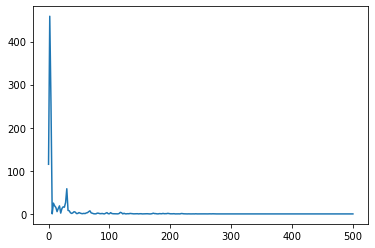

In [93]:
freqs, psd = signal.welch(sig, 1000, nperseg=len(sig))
# psd#[2:6]
plt.plot(freqs, psd)
# freqs

In [78]:
sig.shape

(500,)

In [96]:

for ch in range(1,97):
    data = all_data['L'][ch]

    tmp = data['block']['segments'][0][0][0][0][0][0]['spiketrains'][0]#.shape[0]#[2][0][0]
#     print(str(ch).ljust(2), end = ' ')
    for i in range(tmp.shape[0]):
        print(tmp[i][0][0]['an_unit_id'].item(), end=' ')
    print('')

0 255 
0 255 
0 1 2 255 
0 255 
0 1 2 3 255 
0 1 255 
0 1 2 255 
0 1 255 
0 1 255 
0 1 255 
0 1 2 255 
0 1 255 
0 1 2 3 255 
0 1 2 3 255 
0 1 2 255 
0 1 255 
0 1 255 
0 1 255 
0 1 255 
0 1 2 255 
0 255 
0 1 2 255 
0 1 2 3 255 
0 1 2 3 255 
0 1 2 3 255 
0 1 255 
0 1 255 
0 1 255 
0 255 
0 1 255 
0 1 255 
0 1 2 3 255 
0 1 255 
0 1 2 3 255 
0 1 255 
0 1 2 255 
0 1 255 
0 1 2 255 
0 1 2 3 255 
0 1 255 
0 1 2 255 
0 1 255 
0 255 
0 1 2 255 
0 1 255 
0 1 2 255 
0 1 255 
0 1 2 255 
0 1 255 
0 255 
0 1 255 
0 1 2 3 255 
0 255 
0 1 2 255 
0 1 255 
0 1 2 255 
0 1 255 
0 1 255 
0 1 255 
0 1 255 
0 1 2 3 255 
0 1 255 
0 1 2 255 
0 1 255 
0 1 255 
0 1 255 
0 1 255 
0 1 2 3 255 
0 1 255 
0 1 2 255 
0 1 2 3 255 
0 255 
0 1 255 
0 1 255 
0 1 2 255 
0 1 2 255 
0 1 2 3 255 
0 1 2 255 
0 255 
0 1 2 3 255 
0 1 255 
0 1 2 255 
0 1 2 255 
0 1 2 255 
0 1 2 255 
0 1 255 
0 1 255 
0 1 255 
0 1 255 
0 1 2 255 
0 1 2 255 
0 1 255 
0 1 255 
0 1 2 255 
0 1 2 255 
0 1 2 255 


In [8]:
ch = 38

def get_st_feat(monkey, ch, start_time, window_time):
    data = all_data[monkey][ch]
    tmp = data['block']['segments'][0][0][0][0][0][0]['spiketrains'][0]
    st = None
    for i in range(tmp.shape[0]):
        if tmp[i][0][0]['an_unit_id'].item() == 1: st = tmp[i][0][0]
        elif tmp[i][0][0]['an_unit_id'].item() == 0 and st is None: st = tmp[i][0][0]
    assert st['times_units'].item() == '(1.0/30000 * s)'
    st['times'][0]
    st_op = start_time*30000
    st_ed = (start_time+window_time)*30000
    return ((st['times'][0] >= st_op) & (st['times'][0] < st_ed)).sum()

get_st_feat('L', 38, 3.4224, 0.5)

20

In [10]:
get_lfp_feat('N', 3, 3.4224, 0.5)
# get_st_feat('L', 38, 3.4224, 0.5)

array([2.5811630e+02, 1.8595123e-01, 2.5024275e+01, 1.8746813e+01],
      dtype=float32)

In [13]:
get_electrodes('N', 1, 1, 3)

[-1, 79, 77, 81, 80, 78, 83, 84, 82]

In [31]:
monkey = 'N'
offset = 0.2
window_time = 0.5

def get_all_feat_and_labels(monkey, )
trials = get_trial_time_and_label(monkey, 'GO-ON')

all_feat = {}
            
for ch in range(1,97):
    st_feat = []
    if monkey == 'N': lfp_feat = []
    for trial_t, label in trials:
        start_time = trial_t + offset
        st_feat.append(get_st_feat(monkey, ch, start_time, window_time))
        if monkey == 'N': lfp_feat.append(get_lfp_feat(monkey, ch, start_time, window_time))
    all_feat[ch] = {'st_feat': np.stack(st_feat)}
    if monkey == 'N': all_feat[ch]['lfp_feat'] = np.stack(lfp_feat)
labels = np.stack([trial[1] for trial in trials])

In [32]:
all_feat

{1: {'st_feat': array([19, 10,  8,  7, 13,  8, 10, 15, 10, 15, 12, 11, 12,  6, 12,  9,  9,
          7, 13,  7, 19,  8, 10,  4,  8,  8, 11, 12, 11,  7,  6, 14,  9,  2,
         10,  6, 11, 12, 20,  8, 10,  9,  7, 12, 13, 14, 12, 10, 13,  6,  8,
          7, 13,  8,  9,  7,  4,  3,  7,  7, 11, 10, 10,  8, 10, 11,  3, 11,
          8,  9,  9, 16,  8, 11,  1,  2,  2, 12,  5,  5,  4,  2,  5, 12,  8,
          7,  4,  8,  4,  8,  4,  5,  4,  4,  8,  5,  7, 11,  7,  5,  9,  9,
          7,  7,  8,  5,  4, 10,  3,  8,  4, 12, 13, 10,  7, 10, 12,  9,  6,
          9,  9,  5, 10,  9, 12, 12,  7,  5,  8, 11,  7,  4,  8,  7, 13,  8,
          6,  7,  4,  5,  7, 10,  6,  9,  4,  5,  9,  4, 13,  6,  4, 12,  3,
          7,  5,  2,  5]),
  'lfp_feat': array([[2.78183380e+02, 6.88022385e+01, 1.72098303e+00, 3.65026593e+00],
         [5.35304108e+01, 2.59271259e+01, 2.11092167e+01, 3.21814766e+01],
         [2.82139244e+01, 7.52432764e-01, 1.47355843e+01, 1.95299470e+00],
         [2.15560043e+02, 1.4